<h1> Data Visualization </h1>

<h4> Problem Statement</h4>
<h5>Use the inbuilt dataset &#39;titanic&#39; as used in the above problem.<br>
1. Plot a box plot for distribution of age with respect to each gender along with the
information about whether they survived or not. (Column names : &#39;sex&#39; and &#39;age&#39;)<br>
2. Write observations on the inference from the above statistics.</h5>

In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
data = pd.read_csv('train.csv')
data.sample(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
554,555,1,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,NaN,S
864,865,0,2,"Gill, Mr. John William",male,24.0,0,0,233866,13.0000,NaN,S


In [4]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

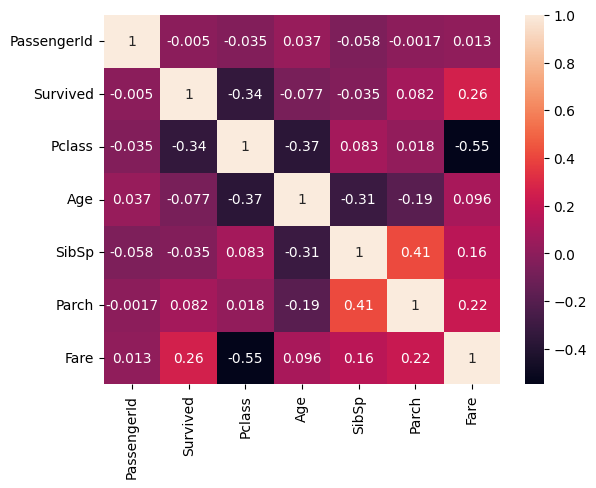

In [6]:
#Age has a lot of null values and is one of the attributes we need to use.
sns.heatmap(data.corr(), annot = True);

From the above corealtion matrix we can see that the attribute 'Age' is not highly dependant on any other attribute <br>
This means we can randomly fill in the missing data for 'Age' within the valid distribution. 

In [7]:
age_null_mask = data['Age'].isnull()

age_mean = data['Age'].mean()
age_std = data['Age'].std()

# generate random ages based on the age distribution of the dataset
age_random = np.random.normal(loc=age_mean, scale=age_std, size=age_null_mask.sum())

# fill in missing age values with random ages
data.loc[age_null_mask, 'Age'] = age_random

In [17]:
# 177 normal random values generated for 177 missing data points
age_random.size

177

In [8]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
data.sample(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.000000,0,1,347054,10.4625,G6,S
794,795,0,3,"Dantcheff, Mr. Ristiu",male,25.000000,0,0,349203,7.8958,NaN,S
598,599,0,3,"Boulos, Mr. Hanna",male,4.419244,0,0,2664,7.2250,NaN,C
743,744,0,3,"McNamee, Mr. Neal",male,24.000000,1,0,376566,16.1000,NaN,S
810,811,0,3,"Alexander, Mr. William",male,26.000000,0,0,3474,7.8875,NaN,S
47,48,1,3,"O'Driscoll, Miss. Bridget",female,35.287735,0,0,14311,7.7500,NaN,Q
604,605,1,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.000000,0,0,111426,26.5500,NaN,C


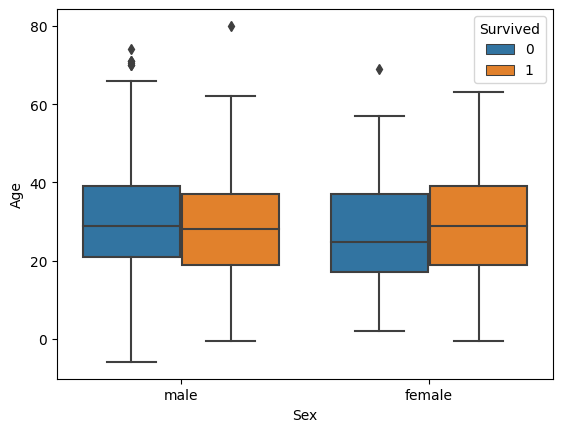

In [14]:
sns.boxplot(x='Sex', y='Age', hue='Survived', data=data);